In [1]:
### Aim: Improving the regression model from lab_7

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#Libary for predictions
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# These Libs are for stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\ljant\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ljant\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#1. Get the data:
df = pd.read_csv(r'C:\Users\ljant\Desktop\Ironhack\06_Advanced_Statistics\lab-customer-analysis-round-7\files_for_lab\csv_files\marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#2. Organising/dealing with the df:

def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# Getting numeric columns

df_numeric =  df.select_dtypes('number')
df_numeric

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [5]:
# Assessing correlations

df_corr = df_numeric.corr()
df_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


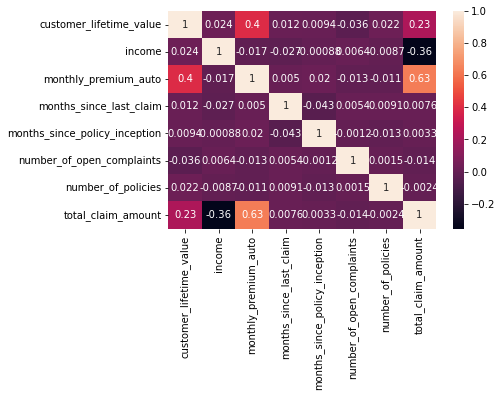

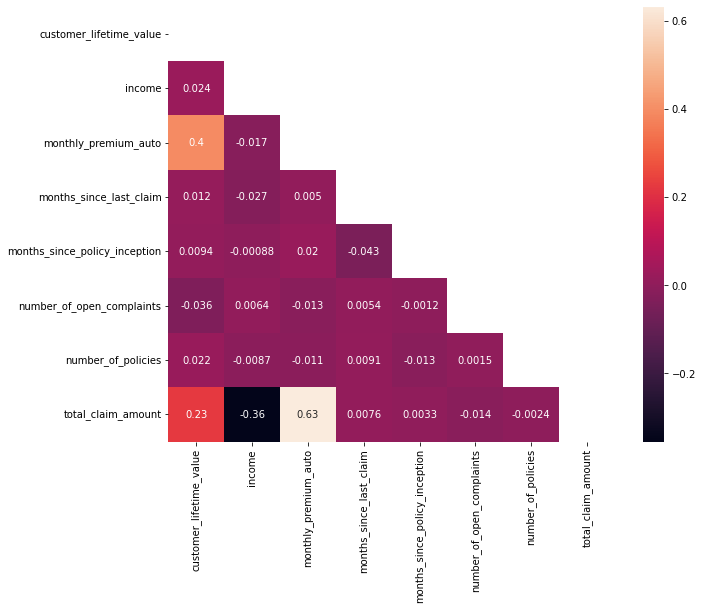

In [6]:
# Assessing multicollinearity between the features with 'total_claim_amount'

sns.heatmap(df_corr, annot=True)
plt.show()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_corr, mask=mask, annot=True)
plt.show()

In [7]:
'''
Idea for improvement:
- Taking out 'customer_lifetime_value'
- 'Denormalise' the data
- Normalise the categorcial data
- Standardise the numerical values
'''


"\nIdea for improvement:\n- Taking out 'customer_lifetime_value'\n- 'Denormalise' the data\n- Normalise the categorcial data\n- Standardise the numerical values\n"

In [8]:
# 3. Processing the data
df.shape #(9134, 24)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train #(7307, 24)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
7999,JO68735,California,2292.791874,No,Basic,Bachelor,2/6/11,Unemployed,F,0,...,30,0,1,Personal Auto,Personal L3,Offer1,Branch,460.800000,Two-Door Car,Medsize
7936,NJ55678,Arizona,7824.492263,No,Basic,Bachelor,2/23/11,Employed,F,64543,...,84,0,2,Personal Auto,Personal L3,Offer2,Call Center,200.177163,Four-Door Car,Medsize
8678,BY88565,California,5219.754045,No,Basic,College,2/23/11,Employed,F,48203,...,47,0,6,Personal Auto,Personal L2,Offer4,Call Center,413.238845,Four-Door Car,Medsize
8943,FM12425,California,19337.901030,No,Extended,College,2/8/11,Employed,M,26488,...,39,0,7,Personal Auto,Personal L2,Offer1,Web,1321.584957,Luxury SUV,Medsize
1538,BU53191,Arizona,8834.322784,No,Basic,Bachelor,2/2/11,Employed,F,34133,...,72,0,7,Personal Auto,Personal L1,Offer1,Call Center,226.968400,SUV,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,SC92090,Arizona,8717.049833,Yes,Basic,College,2/14/11,Employed,M,83846,...,94,3,2,Personal Auto,Personal L2,Offer2,Agent,355.200000,Four-Door Car,Large
4023,DI42246,Arizona,2230.755716,No,Basic,College,1/20/11,Unemployed,M,0,...,49,0,1,Personal Auto,Personal L2,Offer1,Agent,325.886070,Four-Door Car,Medsize
7259,MT58123,California,13869.927050,Yes,Basic,College,1/21/11,Employed,M,28432,...,59,0,2,Corporate Auto,Corporate L2,Offer2,Branch,612.300581,SUV,Small
5200,SU95720,California,8923.113112,No,Extended,High School or Below,1/14/11,Unemployed,M,0,...,80,0,9,Personal Auto,Personal L3,Offer4,Branch,900.000000,SUV,Small


In [9]:
# 'Saving' the target value: 'total_claim_amount'

target = df_train[['total_claim_amount']].reset_index(drop = True)
target

,total_claim_amount
0,460.800000
1,200.177163
2,413.238845
3,1321.584957
4,226.968400
...,...
7302,355.200000
7303,325.886070
7304,612.300581
7305,900.000000


In [10]:
# selecting only numerical data
df_num = df_train.select_dtypes('number')
df_num = df_num.drop(['total_claim_amount'], axis = 1)
df_num
#(7307, 7)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
7999,2292.791874,0,64,18,30,0,1
7936,7824.492263,64543,65,1,84,0,2
8678,5219.754045,48203,66,20,47,0,6
8943,19337.901030,26488,247,21,39,0,7
1538,8834.322784,34133,111,0,72,0,7
...,...,...,...,...,...,...,...
1293,8717.049833,83846,74,22,94,3,2
4023,2230.755716,0,62,9,49,0,1
7259,13869.927050,28432,118,1,59,0,2
5200,8923.113112,0,125,22,80,0,9


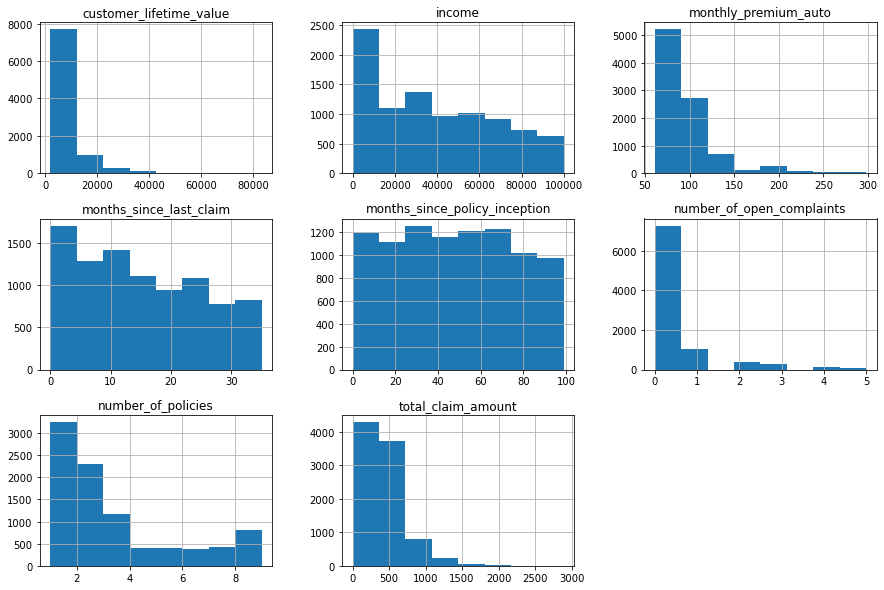

In [11]:
# Function to see all plots at once
df.hist(bins=8, figsize=(15, 10))
plt.show()

In [12]:
### 1. Run the original data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # initialising the model; normalising the data
normalised_data = scaler.fit_transform(df_num) # and fit to data
normalised_data = pd.DataFrame(normalised_data, columns = df_num.columns)
normalised_data
#(7307, 8)

C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.004840,0.000000,0.012712,0.514286,0.303030,0.0,0.000
1,0.072775,0.645682,0.016949,0.028571,0.848485,0.0,0.125
2,0.040786,0.482218,0.021186,0.571429,0.474747,0.0,0.625
3,0.214171,0.264983,0.788136,0.600000,0.393939,0.0,0.750
4,0.085176,0.341463,0.211864,0.000000,0.727273,0.0,0.750
...,...,...,...,...,...,...,...
7302,0.083736,0.838787,0.055085,0.628571,0.949495,0.6,0.125
7303,0.004078,0.000000,0.004237,0.257143,0.494949,0.0,0.000
7304,0.147019,0.284431,0.241525,0.028571,0.595960,0.0,0.125
7305,0.086267,0.000000,0.271186,0.628571,0.808081,0.0,1.000


In [13]:
# One Hot/Label Encoding (categorical).

df_cat = df_train.select_dtypes('object').reset_index(drop = True)
df_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,JO68735,California,No,Basic,Bachelor,2/6/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer1,Branch,Two-Door Car,Medsize
1,NJ55678,Arizona,No,Basic,Bachelor,2/23/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Call Center,Four-Door Car,Medsize
2,BY88565,California,No,Basic,College,2/23/11,Employed,F,Suburban,Divorced,Personal Auto,Personal L2,Offer4,Call Center,Four-Door Car,Medsize
3,FM12425,California,No,Extended,College,2/8/11,Employed,M,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Web,Luxury SUV,Medsize
4,BU53191,Arizona,No,Basic,Bachelor,2/2/11,Employed,F,Rural,Divorced,Personal Auto,Personal L1,Offer1,Call Center,SUV,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,SC92090,Arizona,Yes,Basic,College,2/14/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Large
7303,DI42246,Arizona,No,Basic,College,1/20/11,Unemployed,M,Suburban,Married,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize
7304,MT58123,California,Yes,Basic,College,1/21/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer2,Branch,SUV,Small
7305,SU95720,California,No,Extended,High School or Below,1/14/11,Unemployed,M,Suburban,Married,Personal Auto,Personal L3,Offer4,Branch,SUV,Small


In [14]:
df_cat = pd.get_dummies(df_cat[['state','response','coverage', 'location_code','policy_type', 'sales_channel']], dtype = int)
df_cat

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,location_code_Rural,location_code_Suburban,location_code_Urban,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0
7303,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
7304,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0
7305,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [15]:
def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,location_code_rural,location_code_suburban,location_code_urban,policy_type_corporate_auto,policy_type_personal_auto,policy_type_special_auto,sales_channel_agent,sales_channel_branch,sales_channel_call_center,sales_channel_web
0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0
7303,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
7304,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0
7305,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [16]:
df_model = pd.concat([df_cat, normalised_data], axis = 1).reset_index(drop = True)
df_model

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,...,sales_channel_branch,sales_channel_call_center,sales_channel_web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0.004840,0.000000,0.012712,0.514286,0.303030,0.0,0.000
1,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.072775,0.645682,0.016949,0.028571,0.848485,0.0,0.125
2,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0.040786,0.482218,0.021186,0.571429,0.474747,0.0,0.625
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0.214171,0.264983,0.788136,0.600000,0.393939,0.0,0.750
4,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.085176,0.341463,0.211864,0.000000,0.727273,0.0,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0.083736,0.838787,0.055085,0.628571,0.949495,0.6,0.125
7303,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0.004078,0.000000,0.004237,0.257143,0.494949,0.0,0.000
7304,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0.147019,0.284431,0.241525,0.028571,0.595960,0.0,0.125
7305,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0.086267,0.000000,0.271186,0.628571,0.808081,0.0,1.000


In [17]:
# Linear regression

#a) Build regression with 'total_claim_amount' as target value; testing with income

Y = target
X = df_model

# The model: Y = inter + coef. * X

X = sm.add_constant(X) # here adding the intercept

# The model:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1029.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:24:44   Log-Likelihood:                -46708.
No. Observations:                7307   AIC:                         9.346e+04
Df Residuals:                    7285   BIC:                         9.361e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1.152e+14    2.4e+14      0.480      0.631   -3.55e+14    5.86e+14
state_arizona                 -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
state_california              -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
state_nevada                  -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
state_oregon                  -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
state_washington              -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
response_no                   -1.268e+14   2.57e+14     -0.494      0.621    -6.3e+14    3.76e+14
response_yes                  -1.268e+14   2.57e+14     -0.494      0.621    -6.3e+14    3.76e+14
coverage_basic                 -4.24e+13   9.25e+13     -0.458      0.647   -2.24e+14    1.39e+14
coverage_extended              -4.24e+13   9.25e+13     -0.458      0.647   -2.24e+14    1.39e+14
coverage_premium               -4.24e+13   9.25e+13     -0.458      0.647   -2.24e+14    1.39e+14
location_code_rural            2.313e+13   1.29e+14      0.179      0.858    -2.3e+14    2.76e+14
location_code_suburban         2.313e+13   1.29e+14      0.179      0.858    -2.3e+14    2.76e+14
location_code_urban            2.313e+13   1.29e+14      0.179      0.858    -2.3e+14    2.76e+14
policy_type_corporate_auto    -1.311e+12   5.45e+13     -0.024      0.981   -1.08e+14    1.06e+14
policy_type_personal_auto     -1.311e+12   5.45e+13     -0.024      0.981   -1.08e+14    1.06e+14
policy_type_special_auto      -1.311e+12   5.45e+13     -0.024      0.981   -1.08e+14    1.06e+14
sales_channel_agent            6.754e+13   1.61e+14      0.420      0.674   -2.47e+14    3.83e+14
sales_channel_branch           6.754e+13   1.61e+14      0.420      0.674   -2.47e+14    3.83e+14
sales_channel_call_center      6.754e+13   1.61e+14      0.420      0.674   -2.47e+14    3.83e+14
sales_channel_web              6.754e+13   1.61e+14      0.420      0.674   -2.47e+14    3.83e+14
customer_lifetime_value          -6.3547     22.277     -0.285      0.775     -50.024      37.314
income                         -120.3840      6.301    -19.105      0.000    -132.736    -108.032
monthly_premium_auto           1178.0044     14.070     83.727      0.000    1150.424    1205.585
months_since_last_claim           6.4934      5.919      1.097      0.273      -5.109      18.096
months_since_policy_inception    -1.6991      6.035     -0.282      0.778     -13.529      10.131
number_of_open_complaints       -13.2514      9.281     -1.428      0.153     -31.445       4.942
number_of_policies                1.4830      5.647      0.263      0.793      -9.586      12.552
=============================================

In [18]:
# Now with the test data

#1. # 'Saving' the target value: 'total_claim_amount'

target_test = df_test[['total_claim_amount']].reset_index(drop = True)
target_test

,total_claim_amount
0,371.803029
1,276.877348
2,525.600000
3,388.800000
4,163.046956
...,...
1822,792.000000
1823,396.105473
1824,445.879224
1825,472.043042


In [19]:
#2 Normalising numerical columns

df_num = df_test.select_dtypes('number')
df_num = df_num.drop(['total_claim_amount'], axis = 1)
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
613,7281.440140,0,69,28,28,3,2
7644,2520.301352,56228,65,4,79,0,1
8552,6952.651187,0,73,2,38,3,2
1514,9840.082616,94590,81,26,31,0,2
2738,16045.109520,0,65,10,10,0,2
...,...,...,...,...,...,...,...
6493,3857.770745,0,110,20,62,0,1
8713,4335.676738,30574,114,19,10,1,1
1702,5764.784159,22134,72,13,81,0,3
7503,2854.266940,34807,73,8,90,0,1


In [20]:
scaler = MinMaxScaler() # initialising the model; normalising the data
normalised_data = scaler.fit_transform(df_num) # and fit to data
normalised_data = pd.DataFrame(normalised_data, columns = df_num.columns)
normalised_data

C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.074428,0.000000,0.033755,0.800000,0.282828,0.6,0.125
1,0.008603,0.562387,0.016878,0.114286,0.797980,0.0,0.000
2,0.069883,0.000000,0.050633,0.057143,0.383838,0.6,0.125
3,0.109803,0.946080,0.084388,0.742857,0.313131,0.0,0.125
4,0.195590,0.000000,0.016878,0.285714,0.101010,0.0,0.125
...,...,...,...,...,...,...,...
1822,0.027095,0.000000,0.206751,0.571429,0.626263,0.0,0.000
1823,0.033702,0.305798,0.223629,0.542857,0.101010,0.2,0.000
1824,0.053460,0.221382,0.046414,0.371429,0.818182,0.0,0.250
1825,0.013221,0.348136,0.050633,0.228571,0.909091,0.0,0.000


In [21]:
#3. One Hot/Label Encoding (categorical columns).

df_cat = df_test.select_dtypes('object').reset_index(drop = True)
df_cat = pd.get_dummies(df_cat[['state','response','coverage', 'location_code','policy_type', 'sales_channel']], dtype = int)

# Adjusting column headers

def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,location_code_rural,location_code_suburban,location_code_urban,policy_type_corporate_auto,policy_type_personal_auto,policy_type_special_auto,sales_channel_agent,sales_channel_branch,sales_channel_call_center,sales_channel_web
0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1
1823,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1
1824,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1825,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0


In [22]:
df_model_test = pd.concat([df_cat, normalised_data], axis = 1).reset_index(drop = True)
df_model_test

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,...,sales_channel_branch,sales_channel_call_center,sales_channel_web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.074428,0.000000,0.033755,0.800000,0.282828,0.6,0.125
1,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0.008603,0.562387,0.016878,0.114286,0.797980,0.0,0.000
2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0.069883,0.000000,0.050633,0.057143,0.383838,0.6,0.125
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0.109803,0.946080,0.084388,0.742857,0.313131,0.0,0.125
4,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0.195590,0.000000,0.016878,0.285714,0.101010,0.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0.027095,0.000000,0.206751,0.571429,0.626263,0.0,0.000
1823,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0.033702,0.305798,0.223629,0.542857,0.101010,0.2,0.000
1824,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0.053460,0.221382,0.046414,0.371429,0.818182,0.0,0.250
1825,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0.013221,0.348136,0.050633,0.228571,0.909091,0.0,0.000


In [23]:
# Multiple regresssion

Y = target_test
X = df_model_test

X = sm.add_constant(X)

# The model:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     280.3
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:24:45   Log-Likelihood:                -11696.
No. Observations:                1827   AIC:                         2.344e+04
Df Residuals:                    1805   BIC:                         2.356e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.627e+13   1.22e+14     -0.134      0.894   -2.55e+14    2.23e+14
state_arizona                 -1.268e+13   9.49e+13     -0.134      0.894   -1.99e+14    1.73e+14
state_california              -1.268e+13   9.49e+13     -0.134      0.894   -1.99e+14    1.73e+14
state_nevada                  -1.268e+13   9.49e+13     -0.134      0.894   -1.99e+14    1.73e+14
state_oregon                  -1.268e+13   9.49e+13     -0.134      0.894   -1.99e+14    1.73e+14
state_washington              -1.268e+13   9.49e+13     -0.134      0.894   -1.99e+14    1.73e+14
response_no                    9.211e+13   6.89e+14      0.134      0.894   -1.26e+15    1.44e+15
response_yes                   9.211e+13   6.89e+14      0.134      0.894   -1.26e+15    1.44e+15
coverage_basic                 1.888e+12   1.41e+13      0.134      0.894   -2.58e+13    2.96e+13
coverage_extended              1.888e+12   1.41e+13      0.134      0.894   -2.58e+13    2.96e+13
coverage_premium               1.888e+12   1.41e+13      0.134      0.894   -2.58e+13    2.96e+13
location_code_rural           -3.001e+13   2.25e+14     -0.134      0.894   -4.71e+14    4.11e+14
location_code_suburban        -3.001e+13   2.25e+14     -0.134      0.894   -4.71e+14    4.11e+14
location_code_urban           -3.001e+13   2.25e+14     -0.134      0.894   -4.71e+14    4.11e+14
policy_type_corporate_auto    -1.429e+13   1.07e+14     -0.134      0.894   -2.24e+14    1.95e+14
policy_type_personal_auto     -1.429e+13   1.07e+14     -0.134      0.894   -2.24e+14    1.95e+14
policy_type_special_auto      -1.429e+13   1.07e+14     -0.134      0.894   -2.24e+14    1.95e+14
sales_channel_agent           -2.075e+13   1.55e+14     -0.134      0.894   -3.25e+14    2.84e+14
sales_channel_branch          -2.075e+13   1.55e+14     -0.134      0.894   -3.25e+14    2.84e+14
sales_channel_call_center     -2.075e+13   1.55e+14     -0.134      0.894   -3.25e+14    2.84e+14
sales_channel_web             -2.075e+13   1.55e+14     -0.134      0.894   -3.25e+14    2.84e+14
customer_lifetime_value        -114.3068     37.422     -3.055      0.002    -187.702     -40.912
income                         -118.7629     12.584     -9.438      0.000    -143.444     -94.082
monthly_premium_auto           1313.8968     29.058     45.216      0.000    1256.905    1370.888
months_since_last_claim          10.0043     11.857      0.844      0.399     -13.250      33.259
months_since_policy_inception    -4.2773     12.193     -0.351      0.726     -28.191      19.637
number_of_open_complaints         4.6997     19.274      0.244      0.807     -33.102      42.502
number_of_policies               18.0605     11.810      1.529      0.126      -5.102      41.223
=============================================

In [24]:
# Predictions and error calculation

Y = target
X = df_model

Y_test = target_test
X_test = df_model_test

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

# This is the same as above
# But now it can be used for predictions:


from sklearn.metrics import mean_absolute_error

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))


C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


R2 value is =  0.76
The intercept of the model is =  [-1.3688411e+16]
The coefficients of the model are =  [[-7.97402688e+14 -7.97402688e+14 -7.97402688e+14 -7.97402688e+14
  -7.97402688e+14  3.24990167e+14  3.24990167e+14 -1.01608421e+15
  -1.01608421e+15 -1.01608421e+15 -1.14783788e+15 -1.14783788e+15
  -1.14783788e+15  1.19324720e+16  1.19324720e+16  1.19324720e+16
   4.39227362e+15  4.39227362e+15  4.39227362e+15  4.39227362e+15
  -7.78312656e+00 -1.22293532e+02  1.17827289e+03  6.09725927e+00
   4.67129784e+00 -9.75618372e+00  4.87272392e+00]]
The mse of the model is =  21760.57
The root mse of the model is =  147.51
The mean absolute error of the model is =  102.3


C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\lja

In [25]:
### Solution 1: Dropping 'customer_lifetime_value' (due to possible multicollinearity)

target_1 = df_train[['total_claim_amount']].reset_index(drop = True)

In [26]:
df_num = df_train.select_dtypes('number')
df_num = df_num.drop(['total_claim_amount', 'customer_lifetime_value'], axis = 1)
df_num        

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
7999,0,64,18,30,0,1
7936,64543,65,1,84,0,2
8678,48203,66,20,47,0,6
8943,26488,247,21,39,0,7
1538,34133,111,0,72,0,7
...,...,...,...,...,...,...
1293,83846,74,22,94,3,2
4023,0,62,9,49,0,1
7259,28432,118,1,59,0,2
5200,0,125,22,80,0,9


In [27]:
scaler = MinMaxScaler() # initialising the model; normalising the data
normalised_data = scaler.fit_transform(df_num) # and fit to data
normalised_data = pd.DataFrame(normalised_data, columns = df_num.columns)
normalised_data

C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.000000,0.012712,0.514286,0.303030,0.0,0.000
1,0.645682,0.016949,0.028571,0.848485,0.0,0.125
2,0.482218,0.021186,0.571429,0.474747,0.0,0.625
3,0.264983,0.788136,0.600000,0.393939,0.0,0.750
4,0.341463,0.211864,0.000000,0.727273,0.0,0.750
...,...,...,...,...,...,...
7302,0.838787,0.055085,0.628571,0.949495,0.6,0.125
7303,0.000000,0.004237,0.257143,0.494949,0.0,0.000
7304,0.284431,0.241525,0.028571,0.595960,0.0,0.125
7305,0.000000,0.271186,0.628571,0.808081,0.0,1.000


In [28]:

df_cat = df_train.select_dtypes('object').reset_index(drop = True)
df_cat = pd.get_dummies(df_cat[['state','response','coverage', 'location_code','policy_type', 'sales_channel']], dtype = int)

# Adjusting column headers

def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,location_code_rural,location_code_suburban,location_code_urban,policy_type_corporate_auto,policy_type_personal_auto,policy_type_special_auto,sales_channel_agent,sales_channel_branch,sales_channel_call_center,sales_channel_web
0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0
7303,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
7304,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0
7305,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [29]:
df_model_1 = pd.concat([df_cat, normalised_data], axis = 1).reset_index(drop = True)
df_model_1

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,...,sales_channel_agent,sales_channel_branch,sales_channel_call_center,sales_channel_web,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0.000000,0.012712,0.514286,0.303030,0.0,0.000
1,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0.645682,0.016949,0.028571,0.848485,0.0,0.125
2,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0.482218,0.021186,0.571429,0.474747,0.0,0.625
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0.264983,0.788136,0.600000,0.393939,0.0,0.750
4,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0.341463,0.211864,0.000000,0.727273,0.0,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0.838787,0.055085,0.628571,0.949495,0.6,0.125
7303,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0.000000,0.004237,0.257143,0.494949,0.0,0.000
7304,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0.284431,0.241525,0.028571,0.595960,0.0,0.125
7305,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0.000000,0.271186,0.628571,0.808081,0.0,1.000


In [30]:
## Same with test data


target_1_test = df_test[['total_claim_amount']].reset_index(drop = True)

df_num = df_test.select_dtypes('number')
df_num = df_num.drop(['total_claim_amount', 'customer_lifetime_value'], axis = 1)

scaler = MinMaxScaler()
normalised_data = scaler.fit_transform(df_num) 
normalised_data = pd.DataFrame(normalised_data, columns = df_num.columns)

df_cat = df_test.select_dtypes('object').reset_index(drop = True)
df_cat = pd.get_dummies(df_cat[['state','response','coverage', 'location_code','policy_type', 'sales_channel']], dtype = int)


def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

df_model_1_test = pd.concat([df_cat, normalised_data], axis = 1).reset_index(drop = True)

df_model_1_test

C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,...,sales_channel_agent,sales_channel_branch,sales_channel_call_center,sales_channel_web,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0.000000,0.033755,0.800000,0.282828,0.6,0.125
1,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0.562387,0.016878,0.114286,0.797980,0.0,0.000
2,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0.000000,0.050633,0.057143,0.383838,0.6,0.125
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0.946080,0.084388,0.742857,0.313131,0.0,0.125
4,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0.000000,0.016878,0.285714,0.101010,0.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0.000000,0.206751,0.571429,0.626263,0.0,0.000
1823,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0.305798,0.223629,0.542857,0.101010,0.2,0.000
1824,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0.221382,0.046414,0.371429,0.818182,0.0,0.250
1825,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0.348136,0.050633,0.228571,0.909091,0.0,0.000


In [31]:
# Multiple regresssion

Y = target_1
X = df_model_1

X = sm.add_constant(X)

# The model:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1081.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:24:45   Log-Likelihood:                -46708.
No. Observations:                7307   AIC:                         9.346e+04
Df Residuals:                    7286   BIC:                         9.360e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1.145e+14    2.4e+14      0.477      0.633   -3.55e+14    5.84e+14
state_arizona                 -4.806e+13      3e+14     -0.160      0.873   -6.36e+14     5.4e+14
state_california              -4.806e+13      3e+14     -0.160      0.873   -6.36e+14     5.4e+14
state_nevada                  -4.806e+13      3e+14     -0.160      0.873   -6.36e+14     5.4e+14
state_oregon                  -4.806e+13      3e+14     -0.160      0.873   -6.36e+14     5.4e+14
state_washington              -4.806e+13      3e+14     -0.160      0.873   -6.36e+14     5.4e+14
response_no                   -1.242e+14   2.47e+14     -0.502      0.616   -6.09e+14    3.61e+14
response_yes                  -1.242e+14   2.47e+14     -0.502      0.616   -6.09e+14    3.61e+14
coverage_basic                 -4.28e+13   1.01e+14     -0.423      0.673   -2.41e+14    1.56e+14
coverage_extended              -4.28e+13   1.01e+14     -0.423      0.673   -2.41e+14    1.56e+14
coverage_premium               -4.28e+13   1.01e+14     -0.423      0.673   -2.41e+14    1.56e+14
location_code_rural            2.655e+13   1.23e+14      0.215      0.830   -2.16e+14    2.69e+14
location_code_suburban         2.655e+13   1.23e+14      0.215      0.830   -2.16e+14    2.69e+14
location_code_urban            2.655e+13   1.23e+14      0.215      0.830   -2.16e+14    2.69e+14
policy_type_corporate_auto    -3.949e+12   5.22e+13     -0.076      0.940   -1.06e+14    9.84e+13
policy_type_personal_auto     -3.949e+12   5.22e+13     -0.076      0.940   -1.06e+14    9.84e+13
policy_type_special_auto      -3.949e+12   5.22e+13     -0.076      0.940   -1.06e+14    9.84e+13
sales_channel_agent            7.803e+13   1.71e+14      0.456      0.648   -2.57e+14    4.13e+14
sales_channel_branch           7.803e+13   1.71e+14      0.456      0.648   -2.57e+14    4.13e+14
sales_channel_call_center      7.803e+13   1.71e+14      0.456      0.648   -2.57e+14    4.13e+14
sales_channel_web              7.803e+13   1.71e+14      0.456      0.648   -2.57e+14    4.13e+14
income                         -120.4711      6.297    -19.131      0.000    -132.815    -108.127
monthly_premium_auto           1176.5482     13.126     89.636      0.000    1150.818    1202.279
months_since_last_claim           6.4881      5.917      1.097      0.273      -5.111      18.087
months_since_policy_inception    -1.7661      6.033     -0.293      0.770     -13.593      10.061
number_of_open_complaints       -13.1458      9.278     -1.417      0.157     -31.333       5.042
number_of_policies                1.4229      5.644      0.252      0.801      -9.642      12.488
==============================================================================
Omnibus:                     3573.379   Durbin-Watson:          

In [32]:
# Predictions and error calculation

Y = target_1
X = df_model_1

Y_test = target_1_test
X_test = df_model_1_test

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

# This is the same as above
# But now it can be used for predictions:


from sklearn.metrics import mean_absolute_error

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))

R2 value is =  0.76
The intercept of the model is =  [-6.01075285e+14]
The coefficients of the model are =  [[ 1.03797117e+14  1.03797117e+14  1.03797117e+14  1.03797117e+14
   1.03797117e+14 -1.64222218e+14 -1.64222218e+14  7.64892762e+14
   7.64892762e+14  7.64892762e+14 -1.54996093e+14 -1.54996093e+14
  -1.54996093e+14  3.37185528e+14  3.37185528e+14  3.37185528e+14
  -2.85581812e+14 -2.85581812e+14 -2.85581812e+14 -2.85581812e+14
  -1.20814600e+02  1.17656006e+03  6.39858903e+00 -1.55228721e+00
  -1.33147883e+01  1.42303401e+00]]
The mse of the model is =  21753.84
The root mse of the model is =  147.49
The mean absolute error of the model is =  102.29


C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\lja

In [33]:
### Dropping 'customer_lifetime_value' did not change anything in R² or the MSE/MAE

In [34]:
### Solution 2: Do without normalised data

# Train Data

target_2 = df_train[['total_claim_amount']].reset_index(drop = True)

df_num = df_train.select_dtypes('number')
df_num = df_num.drop(['total_claim_amount'], axis = 1).reset_index(drop = True)

df_cat = df_train.select_dtypes('object').reset_index(drop = True)
df_cat = pd.get_dummies(df_cat[['state','response','coverage', 'location_code','policy_type', 'sales_channel']], dtype = int)


def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

df_model_2 = pd.concat([df_cat, df_num], axis = 1).reset_index(drop = True)

df_model_2

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,...,sales_channel_branch,sales_channel_call_center,sales_channel_web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,1,0,0,0,1,0,1,0,0,...,1,0,0,2292.791874,0,64,18,30,0,1
1,1,0,0,0,0,1,0,1,0,0,...,0,1,0,7824.492263,64543,65,1,84,0,2
2,0,1,0,0,0,1,0,1,0,0,...,0,1,0,5219.754045,48203,66,20,47,0,6
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,19337.901030,26488,247,21,39,0,7
4,1,0,0,0,0,1,0,1,0,0,...,0,1,0,8834.322784,34133,111,0,72,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1,0,0,0,0,0,1,1,0,0,...,0,0,0,8717.049833,83846,74,22,94,3,2
7303,1,0,0,0,0,1,0,1,0,0,...,0,0,0,2230.755716,0,62,9,49,0,1
7304,0,1,0,0,0,0,1,1,0,0,...,1,0,0,13869.927050,28432,118,1,59,0,2
7305,0,1,0,0,0,1,0,0,1,0,...,1,0,0,8923.113112,0,125,22,80,0,9


In [35]:
# Test Data

target_2_test = df_test[['total_claim_amount']].reset_index(drop = True)

df_num = df_test.select_dtypes('number')
df_num = df_num.drop(['total_claim_amount'], axis = 1).reset_index(drop = True)

df_cat = df_test.select_dtypes('object').reset_index(drop = True)
df_cat = pd.get_dummies(df_cat[['state','response','coverage', 'location_code','policy_type', 'sales_channel']], dtype = int)


def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

df_model_2_test = pd.concat([df_cat, df_num], axis = 1).reset_index(drop = True)

df_model_2_test

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,...,sales_channel_branch,sales_channel_call_center,sales_channel_web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,7281.440140,0,69,28,28,3,2
1,0,0,0,1,0,1,0,1,0,0,...,0,1,0,2520.301352,56228,65,4,79,0,1
2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,6952.651187,0,73,2,38,3,2
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,9840.082616,94590,81,26,31,0,2
4,0,0,0,0,1,1,0,1,0,0,...,0,0,0,16045.109520,0,65,10,10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1,0,0,0,0,1,0,1,0,0,...,0,0,1,3857.770745,0,110,20,62,0,1
1823,0,1,0,0,0,1,0,1,0,0,...,0,0,1,4335.676738,30574,114,19,10,1,1
1824,1,0,0,0,0,1,0,1,0,0,...,0,1,0,5764.784159,22134,72,13,81,0,3
1825,0,0,0,1,0,1,0,1,0,0,...,0,0,0,2854.266940,34807,73,8,90,0,1


In [36]:
# Predictions and error calculation

Y = target_2
X = df_model_2

Y_test = target_2_test
X_test = df_model_2_test

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

# This is the same as above
# But now it can be used for predictions:


from sklearn.metrics import mean_absolute_error

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))

R2 value is =  0.76
The intercept of the model is =  [-75.48044764]
The coefficients of the model are =  [[-4.53456350e+00  2.04333950e+00  2.18549231e+00 -3.95548750e+00
   4.26121919e+00  1.69675024e+01 -1.69675024e+01  5.09930596e+00
  -7.24736522e+00  2.14805926e+00 -2.03588277e+02  1.88213978e+02
   1.53742992e+01 -8.93490871e+00 -7.12448336e+00  1.60593921e+01
  -1.76271216e-01  3.91283039e-02 -1.45548550e+00  1.59262842e+00
  -8.00285596e-05 -1.20485077e-03  4.99123817e+00  1.86373518e-01
  -1.77644523e-02 -2.65210066e+00  1.86703998e-01]]
The mse of the model is =  21721.16
The root mse of the model is =  147.38
The mean absolute error of the model is =  102.39


C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\lja

In [37]:
### Not doing the normalisation did not change anything in R² or the MSE/MAE

In [38]:
# Multiple regresssion

Y = target
X = df_model

X = sm.add_constant(X)

# The model:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1029.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:24:46   Log-Likelihood:                -46708.
No. Observations:                7307   AIC:                         9.346e+04
Df Residuals:                    7285   BIC:                         9.361e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1.152e+14    2.4e+14      0.480      0.631   -3.55e+14    5.86e+14
state_arizona                 -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
state_california              -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
state_nevada                  -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
state_oregon                  -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
state_washington              -3.541e+13      3e+14     -0.118      0.906   -6.24e+14    5.53e+14
response_no                   -1.268e+14   2.57e+14     -0.494      0.621    -6.3e+14    3.76e+14
response_yes                  -1.268e+14   2.57e+14     -0.494      0.621    -6.3e+14    3.76e+14
coverage_basic                 -4.24e+13   9.25e+13     -0.458      0.647   -2.24e+14    1.39e+14
coverage_extended              -4.24e+13   9.25e+13     -0.458      0.647   -2.24e+14    1.39e+14
coverage_premium               -4.24e+13   9.25e+13     -0.458      0.647   -2.24e+14    1.39e+14
location_code_rural            2.313e+13   1.29e+14      0.179      0.858    -2.3e+14    2.76e+14
location_code_suburban         2.313e+13   1.29e+14      0.179      0.858    -2.3e+14    2.76e+14
location_code_urban            2.313e+13   1.29e+14      0.179      0.858    -2.3e+14    2.76e+14
policy_type_corporate_auto    -1.311e+12   5.45e+13     -0.024      0.981   -1.08e+14    1.06e+14
policy_type_personal_auto     -1.311e+12   5.45e+13     -0.024      0.981   -1.08e+14    1.06e+14
policy_type_special_auto      -1.311e+12   5.45e+13     -0.024      0.981   -1.08e+14    1.06e+14
sales_channel_agent            6.754e+13   1.61e+14      0.420      0.674   -2.47e+14    3.83e+14
sales_channel_branch           6.754e+13   1.61e+14      0.420      0.674   -2.47e+14    3.83e+14
sales_channel_call_center      6.754e+13   1.61e+14      0.420      0.674   -2.47e+14    3.83e+14
sales_channel_web              6.754e+13   1.61e+14      0.420      0.674   -2.47e+14    3.83e+14
customer_lifetime_value          -6.3547     22.277     -0.285      0.775     -50.024      37.314
income                         -120.3840      6.301    -19.105      0.000    -132.736    -108.032
monthly_premium_auto           1178.0044     14.070     83.727      0.000    1150.424    1205.585
months_since_last_claim           6.4934      5.919      1.097      0.273      -5.109      18.096
months_since_policy_inception    -1.6991      6.035     -0.282      0.778     -13.529      10.131
number_of_open_complaints       -13.2514      9.281     -1.428      0.153     -31.445       4.942
number_of_policies                1.4830      5.647      0.263      0.793      -9.586      12.552
=============================================

In [39]:
### Solution 3: Dropping all columns that don't show a signficant influence on the regression model; leaving only 'income' and
#               'monthly_premium_auto'

Y = target
X = df_model[['income', 'monthly_premium_auto']]

Y_test = target_test
X_test = df_model_test[['income', 'monthly_premium_auto']]

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

# This is the same as above
# But now it can be used for predictions:


from sklearn.metrics import mean_absolute_error

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))

R2 value is =  0.53
The intercept of the model is =  [390.24841452]
The coefficients of the model are =  [[-329.92200172 1230.96864041]]
The mse of the model is =  42562.35
The root mse of the model is =  206.31
The mean absolute error of the model is =  148.87


C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\lja

In [40]:
### This decerased the quality of the model

In [41]:
### Solution 4: Dropping the categorical data

# Train Data

target_4 = df_train[['total_claim_amount']].reset_index(drop = True)

df_num = df_train.select_dtypes('number')
df_num = df_num.drop(['total_claim_amount'], axis = 1).reset_index(drop = True)

df_num


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2292.791874,0,64,18,30,0,1
1,7824.492263,64543,65,1,84,0,2
2,5219.754045,48203,66,20,47,0,6
3,19337.901030,26488,247,21,39,0,7
4,8834.322784,34133,111,0,72,0,7
...,...,...,...,...,...,...,...
7302,8717.049833,83846,74,22,94,3,2
7303,2230.755716,0,62,9,49,0,1
7304,13869.927050,28432,118,1,59,0,2
7305,8923.113112,0,125,22,80,0,9


In [42]:
# Test Data

target_4_test = df_test[['total_claim_amount']].reset_index(drop = True)

df_num_test = df_test.select_dtypes('number')
df_num_test = df_num_test.drop(['total_claim_amount'], axis = 1).reset_index(drop = True)
df_num_test


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,7281.440140,0,69,28,28,3,2
1,2520.301352,56228,65,4,79,0,1
2,6952.651187,0,73,2,38,3,2
3,9840.082616,94590,81,26,31,0,2
4,16045.109520,0,65,10,10,0,2
...,...,...,...,...,...,...,...
1822,3857.770745,0,110,20,62,0,1
1823,4335.676738,30574,114,19,10,1,1
1824,5764.784159,22134,72,13,81,0,3
1825,2854.266940,34807,73,8,90,0,1


In [43]:
Y = target_4
X = df_num

Y_test = target_4_test
X_test = df_num_test

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

# This is the same as above
# But now it can be used for predictions:


from sklearn.metrics import mean_absolute_error

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))

R2 value is =  0.53
The intercept of the model is =  [79.03818072]
The coefficients of the model are =  [[-3.14300261e-04 -3.29934489e-03  5.24078021e+00 -9.83072618e-02
  -8.67728821e-02 -1.20152515e+00 -2.40315586e-01]]
The mse of the model is =  42476.69
The root mse of the model is =  206.1
The mean absolute error of the model is =  148.73


C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\lja

In [90]:
### This makes the model worse; I need some of the categorical data 
# Keeping 'state','response', 'location_code', 'policy_type', 'education', 'employmentstatus', 'marital_status'

# Train Data

target_5 = df_train[['total_claim_amount']].reset_index(drop = True)

df_num = df_train.select_dtypes('number')
df_num = df_num.drop(['total_claim_amount'], axis = 1).reset_index(drop = True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_data = scaler.fit_transform(df_num)
normalised_data = pd.DataFrame(normalised_data, columns = df_num.columns)

df_cat = df_train.select_dtypes('object').reset_index(drop = True)
df_cat = pd.get_dummies(df_cat[['state','response', 'location_code', 'policy_type', 'education', 'employmentstatus', 'marital_status']], dtype = int)


def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

df_model_5 = pd.concat([df_cat, normalised_data], axis = 1).reset_index(drop = True)

C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [91]:
# Test data

target_5_test = df_test[['total_claim_amount']].reset_index(drop = True)

df_num = df_test.select_dtypes('number')
df_num = df_num.drop(['total_claim_amount'], axis = 1).reset_index(drop = True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_data = scaler.fit_transform(df_num)
normalised_data = pd.DataFrame(normalised_data, columns = df_num.columns)

df_cat = df_test.select_dtypes('object').reset_index(drop = True)
df_cat = pd.get_dummies(df_cat[['state','response', 'location_code','policy_type', 'education', 'employmentstatus', 'marital_status']], dtype = int)


def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

df_model_5_test = pd.concat([df_cat, normalised_data], axis = 1).reset_index(drop = True)

C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [92]:
Y = target_5
X = df_model_5

Y_test = target_5_test
X_test = df_model_5_test

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

# This is the same as above
# But now it can be used for predictions:


from sklearn.metrics import mean_absolute_error

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ", round(mse,2))
print("The root mse of the model is = ",round(np.sqrt(mse),2))
print("The mean absolute error of the model is = ",round(mae,2))

R2 value is =  0.77
The intercept of the model is =  [1.32635063e+15]
The coefficients of the model are =  [[-7.81027831e+13 -7.81027831e+13 -7.81027831e+13 -7.81027831e+13
  -7.81027831e+13  5.41312934e+14  5.41312934e+14  3.51656737e+14
   3.51656737e+14  3.51656737e+14 -2.13629003e+15 -2.13629003e+15
  -2.13629003e+15 -4.59496342e+13 -4.59496342e+13 -4.59496342e+13
  -4.59496342e+13 -4.59496342e+13  4.10221440e+13  4.10221440e+13
   4.10221440e+13  4.10221440e+13  4.10221440e+13 -7.77646890e+00
  -2.06970807e+01  1.16940558e+03  8.15544309e+00 -4.76807087e+00
  -1.34121490e+01  2.31760435e-01]]
The mse of the model is =  21110.92
The root mse of the model is =  145.3
The mean absolute error of the model is =  99.4


C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\ljant\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\lja

In [ ]:
### I've decided this (model_5) is the best optimised model with R² = 0.77 and MAE = 97.63